<a href="https://colab.research.google.com/github/AlukweJonesTerah/MODELS/blob/main/HospitalAssistant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Setup

In [ ]:
!pip install accelerate
!pip install flask
!pip install datasets

import os
import threading

# We will be using flask, a simple python library, as our webserver
from flask import Flask, render_template, send_file, request

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

# Make an ngrok account

ngrok is a tool that will allow us to get a public link for our application. When we run the Flask app in Colab, we are running it on one of Google's servers, so accessing it through `localhost` is not possible. Instead, we use ngrok, a reverse proxy, to create an internet-accessible way to access the app.

### a) Go to [ngrok.com](https://ngrok.com/)
### b) Click "Sign up for free" and create an account
### c) Verify your email
### d) Go to the [ngrok dashboard](https://dashboard.ngrok.com/get-started/your-authtoken) and copy your Authtoken

<center> 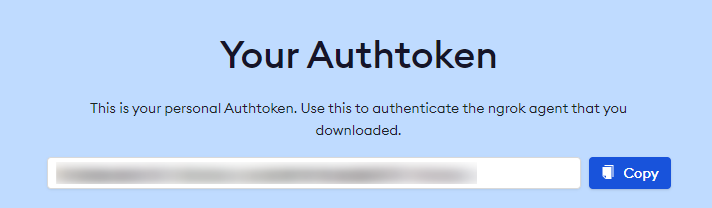</center>

### e) Paste your Authtoken below in place of the existing authtoken (neils) and then **run the cell**

In [ ]:
!pip install pyngrok
from pyngrok import ngrok, conf
conf.get_default().auth_token = '2jKXl0XtTVEB7NW8HIRSvkvwRU8_7ysc5aRsm28esdFQ35Qoo'
# Open a ngrok tunnel to the HTTP server
public_url = ngrok.connect(5000).public_url
# the first link that prints will be the link to your personal website!
print(" * ngrok tunnel \"{}\" -> \"http://127.0.0.1:{}/\"".format(public_url, 5000))

 * ngrok tunnel "https://f18a-35-201-252-197.ngrok-free.app" -> "http://127.0.0.1:5000/"


In [ ]:
import torch
from transformers import pipeline

device = "cuda:0" if torch.cuda.is_available() else "cpu"
#model="HuggingFaceH4/zephyr-7b-beta"
model="TinyLlama/TinyLlama-1.1B-Chat-v1.0"
# This next line instantiates
pipe = pipeline("text-generation", model=model, torch_dtype=torch.bfloat16,device=device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/608 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.20G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.29k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

In [ ]:
messages = [
    {
        "role": "system",
        "content": "You are a friendly farm  Assistant who always gives farming and agricultural advice and answers farmers questions",
    },
    {"role": "user", "content": "My I have been having headachs for the last 5 days. What could be the problem?"},
]
asks = pipe.tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
outputs = pipe(asks, max_new_tokens=512, do_sample=True, temperature=0.7, top_k=50, top_p=0.95)
resp=outputs[0]["generated_text"].split('assistant|>\n')[1]
print(resp)

It's difficult to diagnose an underlying cause of headaches solely based on the symptoms you've described. However, here are some potential causes for a headache:

1. Migraine: A migraine is a headache that is severe and usually accompanied by nausea, vomiting, and sensitivity to light or sound. It can be caused by a number of factors, including stress, allergies, high blood pressure, or a hormonal imbalance.

2. Cluster headaches: Cluster headaches are a type of headache that occurs in cycles. Each headache lasts for a few hours and then fades. These headaches are typically triggered by certain triggers, such as light, noise, or smells.

3. Tension headaches: Tension headaches occur when the muscles in the head and neck become tight or tense, causing a sharp pain. These headaches are often caused by stress, poor posture, or head injuries.

4. Brain tumors: A headache can be a symptom of a brain tumor. Tumors can cause pain, nausea, and difficulty with movement.

5. Hemorrhagic stroke:

In [ ]:
import os
if not os.path.isdir('/content/app/'):
  os.mkdir("/content/app/")
os.chdir("/content/app")
if not os.path.isdir('/content/app/static/'):
  os.mkdir("/content/app/static/")

os.chdir("./static")

css = """
     body {
            font-family: 'Roboto', sans-serif;
            background-color: #f0f4f8;
            margin: 0;
            padding: 0;
            display: flex;
            flex-direction: column;
            min-height: 100vh;
        }
        header {
            background-color: #0073e6;
            color: white;
            padding: 15px 20px;
            text-align: center;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
        }
        .container {
            flex: 1;
            display: flex;
            justify-content: center;
            align-items: center;
            padding: 20px;
        }
        .content {
            background-color: #ffffff;
            border-radius: 10px;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
            padding: 30px;
            max-width: 600px;
            width: 100%;
            text-align: center;
        }
        header h1{
          color: white;
        }
        h1 {
            color: #0073e6;
            font-size: 28px;
            margin-bottom: 20px;
        }
        h2 {
            color: #333;
            font-size: 22px;
            margin-bottom: 15px;
        }
        h3 {
            color: #555;
            font-size: 18px;
            margin-bottom: 20px;
        }
        form {
            margin-top: 20px;
            text-align: left;
        }
        ul {
            list-style: none;
            padding: 0;
        }
        li {
            margin-bottom: 15px;
        }
        label {
            display: block;
            margin-bottom: 5px;
            font-weight: bold;
            color: #333;
        }
        input[type="text"] {
            width: 100%;
            padding: 10px;
            box-sizing: border-box;
            border: 1px solid #ccc;
            border-radius: 5px;
            font-size: 16px;
        }
        .button {
            text-align: right;
        }
        button {
            background-color: #0073e6;
            color: white;
            padding: 10px 20px;
            border: none;
            border-radius: 5px;
            cursor: pointer;
            font-size: 16px;
            transition: background-color 0.3s ease;
        }
        button:hover {
            background-color: #005bb5;
        }
        footer {
            background-color: #0073e6;
            color: white;
            text-align: center;
            padding: 10px 0;
            box-shadow: 0 -4px 8px rgba(0, 0, 0, 0.1);
}"""

with open("styles.css", 'w') as f:
  f.write(css)

os.chdir("..")



os.chdir("/content/app")

html = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <link rel="stylesheet" type="text/css" href="{{ url_for('static',filename='styles.css') }}" />
    <title>Hospital Assistant transformer</title>

</head>
<body>
    <header>
        <h1>Hospital And Health Assistant</h1>
    </header>
    <div class="container">
        <div class="content">
            <h2>Ask the Assistant</h2>
            <h3>{{ question | default("Hospital and Health Assistance LLM", true) }}</h3>
            {% autoescape false %}
                {{ generated_text }}
            {% endautoescape %}
            <form action="/submit-prompt" method="post" id="submission-form">
                <ul>
                    <li>
                        <label for="prompt">Prompt:</label>
                        <input type="text" id="prompt" name="prompt-input" />
                    </li>
                    <li class="button">
                        <button type="submit">Ask</button>
                    </li>
                </ul>
            </form>
        </div>
    </div>
    <footer>
        <p>&copy; 2024 Hospital and Health Assistant</p>
    </footer>
</body>
</html>
"""

with open("index.html", 'w') as f:
  f.write(html)




# Goal: Deploy LLM assistant

Flask App Routing
* routes are API endpoints

In [ ]:
import os
import logging

# Set the root directory correctly
os.chdir("/content/app")
app = Flask(__name__,template_folder='.')

# Update any base URLs to use the public ngrok URL
app.config["BASE_URL"] = public_url


# Define Flask routes
@app.route("/")
def initial():
  return render_template('index.html')


@app.route('/submit-prompt', methods=['POST'])
def generate_image():
  prompt = request.form['prompt-input']
  messages = [
      {
          "role": "system",
          "content": "You are a friendly chatbot who always responds in the style of a pirate",
      },
      {"role": "user", "content": prompt},
  ]

  asks = pipe.tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
  outputs = pipe(asks, max_new_tokens=256, do_sample=True, temperature=0.7, top_k=50, top_p=0.95)
  #getting the users inputted prompt as a variable
  question=outputs[0]["generated_text"].split('user|>\n')[1].split('</s>')[0]

  #getting the response as a variable
  resp=outputs[0]["generated_text"].split('assistant|>\n')[1]

  #reflecting both into the template html
  return render_template('index.html', generated_text=resp.replace("\n"," <br> "), question=question)

# Start the Flask server in a new thread
threading.Thread(target=app.run, kwargs={"use_reloader": False, "debug":True}).start()

 * Serving Flask app '__main__'


# Bonus Section: Fine Tuning OR RAG

There is a dataset in Huggingface that is an Agricultural Q&A dataset. We can use this for finetuning or as a RAG dataset.



In [ ]:
from datasets import load_dataset
dataset = load_dataset("Agri-LLaVA-Anonymous/Agricultural_pests_and_diseases_instruction_tuning_data", split="train")
for i in range(10):
    print(f"Datapoint {i + 1}:")
    print("Question:", dataset['question'][i])
    print("Answer:", dataset['answers'][i])
    print("\n")



 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


Generating train split:   0%|          | 0/7160 [00:00<?, ? examples/s]

Datapoint 1:


KeyError: "Column question not in the dataset. Current columns in the dataset: ['image', 'conversations']"